### Universidad de Granada | ETSIIT | Escuela Internacional de Posgrado
---
# **Proyecto Final**: Parte de Naïve Bayes
---
**Asignatura:** Minería de Datos: Preprocesamiento y Clasificación

**Autor:** Lugli, Valentino Glauco · YB0819879

# Librerías y Datos

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer

from imblearn.under_sampling import NearMiss

In [64]:
df_train = pd.read_csv("../data_preprocess/train_preprocess.csv").drop(columns=["ID"])
df_test = pd.read_csv("../data_preprocess/test_preprocess.csv")
df_test_IDs = df_test["ID"]
df_test = df_test.drop(columns=["ID"])

In [65]:
df_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,...,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,0.043116,0.037134,0.035300,0.031463,0.044047,0.185604,0.050460,0.009622,0.139957,0.188205,...,0.960094,0.506531,0.624798,0.713267,0.383806,0.497606,0.501999,0.734268,0.083206,0.343881
std,0.133951,0.126763,0.123994,0.105729,0.137199,0.100530,0.155326,0.067619,0.141591,0.090881,...,0.195854,0.039860,0.152966,0.087412,0.105083,0.099442,0.148203,0.138666,0.080847,0.045749
min,0.000000,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003288,0.001398,0.001748,0.003969,0.003217,0.159404,0.003125,0.000351,0.055162,0.165948,...,1.000000,0.503284,0.597502,0.715287,0.339755,0.461989,0.411897,0.739170,0.042408,0.330967
50%,0.007397,0.004427,0.004411,0.007891,0.008025,0.162193,0.006889,0.000826,0.095989,0.168683,...,1.000000,0.506781,0.660257,0.735128,0.367881,0.491268,0.467643,0.770193,0.061904,0.347662
75%,0.022231,0.015372,0.014099,0.018464,0.023668,0.171540,0.021545,0.002291,0.166915,0.176354,...,1.000000,0.508487,0.704328,0.748277,0.409207,0.527507,0.550163,0.791212,0.095113,0.362975
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


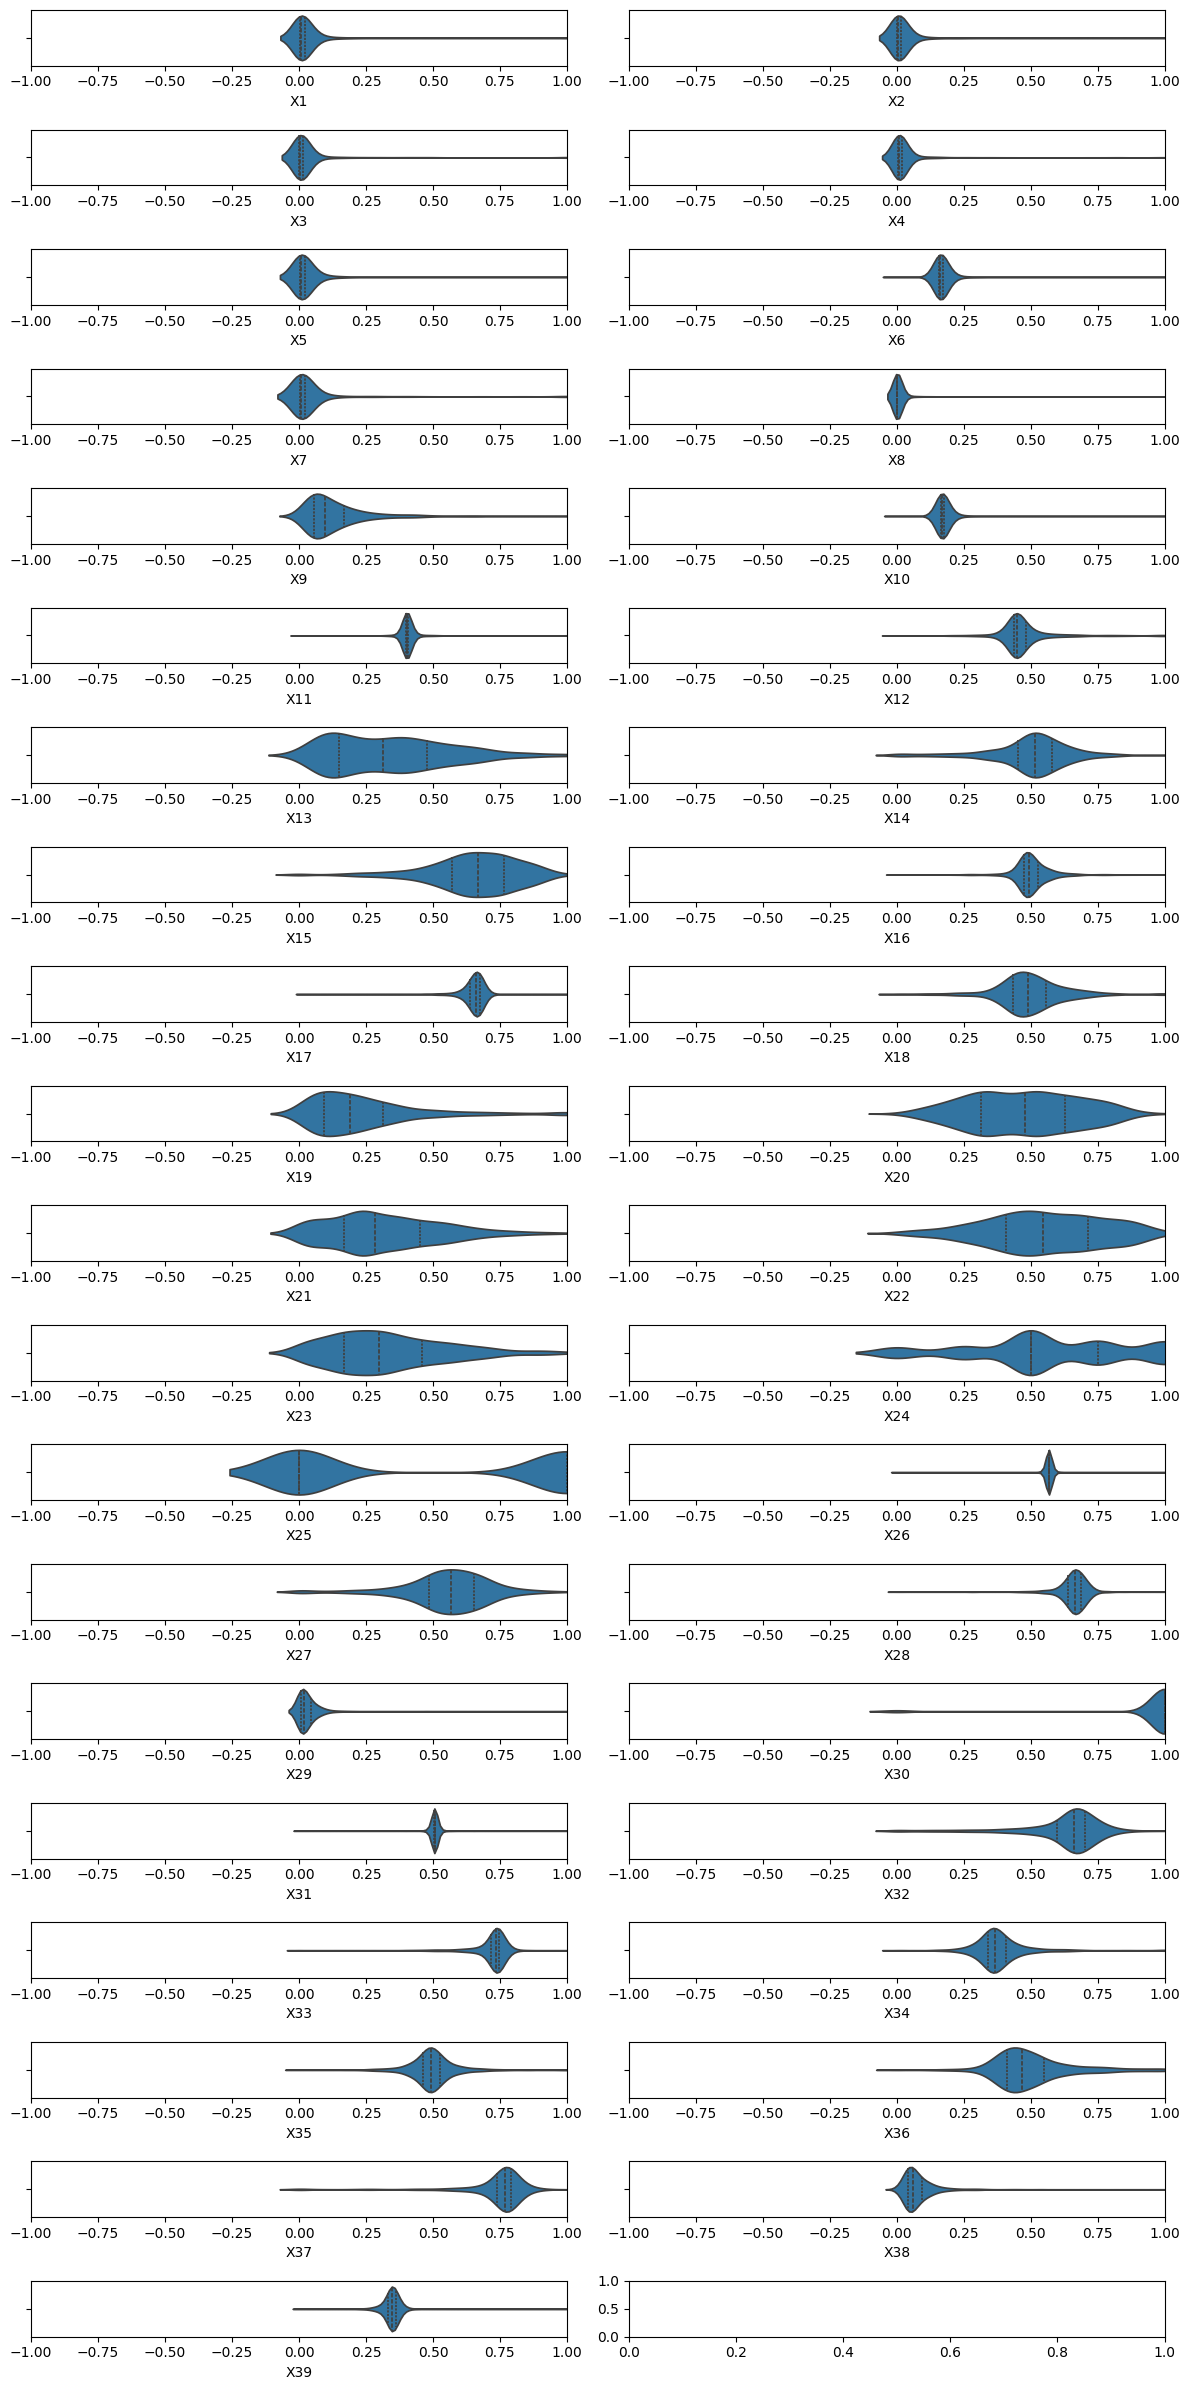

In [227]:
fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(12, 24))

# Flatten the axes array to iterate through each subplot
axes = axes.flatten()

# Loop through each column and create a violin plot
for i, column in enumerate(df_train.drop(columns=["RATE"]).columns):
    sns.violinplot(x=df_train[column], ax=axes[i], inner="quart")
    # Set ticks and labels for each subplot
    axes[i].set_xlim((-1, 1))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

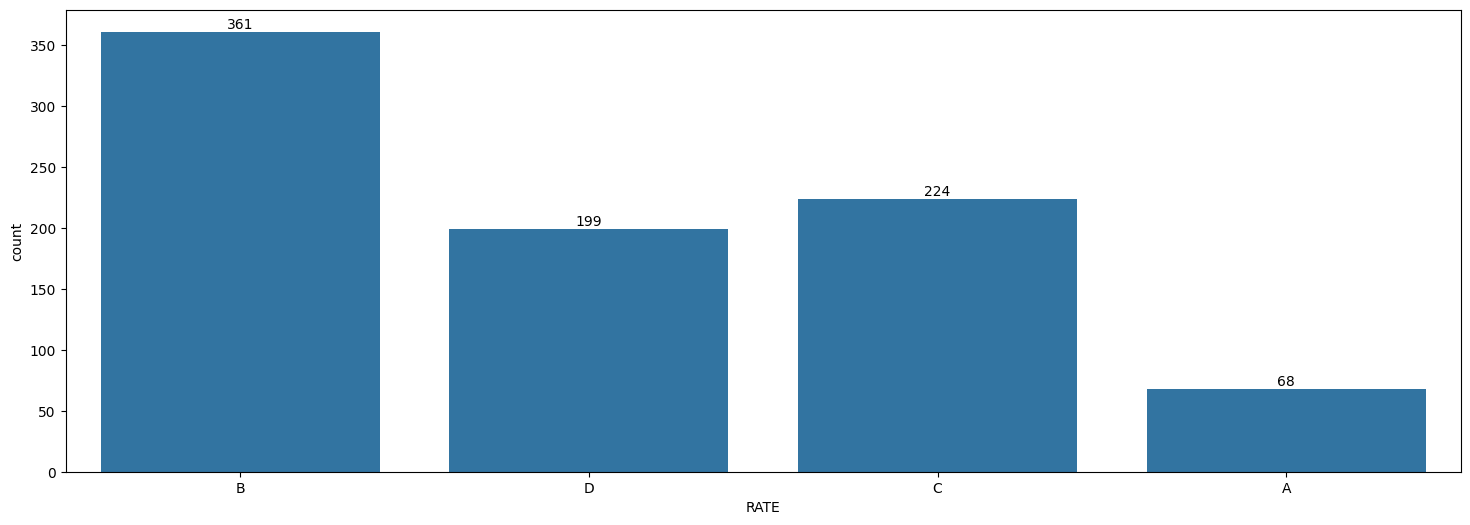

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.countplot(df_train, x="RATE", ax=axes)
axes.bar_label(axes.containers[0])

plt.show()

# Experimentos

## Definiciones

In [210]:
def naive_bayes_fits(x_train, y_train, x_test, y_test, is_categorical = False):
    results = {"gaussian" : {"model" : GaussianNB()},
               "multinom" : {"model" : MultinomialNB(force_alpha=True)},
               "complement" : {"model" : ComplementNB(force_alpha=True)},
               "bernoulli" : {"model" : BernoulliNB(force_alpha=True)},
               "categorical" : {"model" : CategoricalNB(force_alpha=True)}}

    best_acc = -1

    for model in results:

        if not is_categorical and model == "categorical":
            continue

        y_pred_train = results[model]["model"].fit(x_train, y_train).predict(x_train)
        y_pred_test  = results[model]["model"].predict(x_test)
        results[model]["train"] = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)
        results[model]["test"]  = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)
        results[model]["test_pred"]  = y_pred_test
        results[model]["train_pred"]  = y_pred_train
        act_acc = results[model]["test"]["accuracy"]

        print("{}, test acc: {:.4f}%".format(model, act_acc))
        if act_acc > best_acc:
            best_acc = act_acc

    print("Best of all: {:.4f}".format(best_acc))
    return results


def naive_bayes_stats(results):
    pass

## Datos Imbalaceados

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=["RATE"]), 
                                                    df_train["RATE"], stratify=df_train["RATE"], 
                                                    test_size=0.2, 
                                                    random_state=16)

In [212]:
res_og = naive_bayes_fits(X_train, y_train, X_test, y_test)

gaussian, test acc: 0.2632%
multinom, test acc: 0.4152%
complement, test acc: 0.2982%
bernoulli, test acc: 0.4152%
Best of all: 0.4152


### Quitando Variables Colineales

In [23]:
def get_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    print('Correlated Columns are: {}'.format(sorted(drops)))
    return drops

In [211]:
collinear_cols = get_collinear_features(df_train.drop(columns=["RATE"]), 0.4)
X_train_nonc = X_train.drop(columns=collinear_cols)
X_test_nonc  = X_test.drop(columns=collinear_cols)

X2 | X1 | 0.95
X3 | X1 | 0.98
X3 | X2 | 0.97
X4 | X1 | 0.93
X4 | X2 | 0.89
X4 | X3 | 0.94
X5 | X1 | 0.96
X5 | X2 | 0.89
X5 | X3 | 0.93
X5 | X4 | 0.9
X6 | X1 | 0.95
X6 | X2 | 0.95
X6 | X3 | 0.96
X6 | X4 | 0.94
X6 | X5 | 0.91
X7 | X1 | 0.97
X7 | X2 | 0.93
X7 | X3 | 0.94
X7 | X4 | 0.85
X7 | X5 | 0.93
X7 | X6 | 0.89
X8 | X1 | 0.65
X8 | X2 | 0.65
X8 | X3 | 0.69
X8 | X4 | 0.67
X8 | X5 | 0.62
X8 | X6 | 0.7
X8 | X7 | 0.57
X9 | X5 | 0.41
X10 | X1 | 0.89
X10 | X2 | 0.88
X10 | X3 | 0.91
X10 | X4 | 0.92
X10 | X5 | 0.86
X10 | X6 | 0.95
X10 | X7 | 0.82
X10 | X8 | 0.75
X11 | X1 | 0.74
X11 | X2 | 0.77
X11 | X3 | 0.77
X11 | X4 | 0.84
X11 | X5 | 0.73
X11 | X6 | 0.87
X11 | X7 | 0.63
X11 | X8 | 0.67
X11 | X10 | 0.9
X12 | X11 | 0.42
X16 | X15 | 0.55
X17 | X15 | 0.48
X17 | X16 | 0.75
X18 | X15 | 0.58
X18 | X16 | 0.92
X18 | X17 | 0.75
X21 | X15 | 0.65
X21 | X16 | 0.51
X21 | X18 | 0.57
X22 | X15 | 0.8
X22 | X16 | 0.6
X22 | X17 | 0.54
X22 | X18 | 0.66
X22 | X21 | 0.74
X25 | X14 | 0.46
X25 | X21 | 0.41
X27 | X1

In [213]:
res_nonc = naive_bayes_fits(X_train_nonc, y_train, X_test_nonc, y_test)

gaussian, test acc: 0.3801%
multinom, test acc: 0.4211%
complement, test acc: 0.2515%
bernoulli, test acc: 0.4211%
Best of all: 0.4211


### PCA

In [68]:
explained_variance_ratio = 0
i = 0
while(explained_variance_ratio < 0.8):
    i += 1
    pca = PCA(n_components=i)
    pca.fit(X_train)
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)

print("With {} components the PCA retains {:.4f}% of the original variance.".format(i, (explained_variance_ratio*100)))

With 8 components the PCA retains 83.3702% of the original variance.


In [69]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
df_test_pca = pca.transform(df_test)

In [216]:
pca_minmax = MinMaxScaler(feature_range=(0,1))
pca_minmax.fit(X_train_pca)
X_train_pca = pca_minmax.transform(X_train_pca)
X_test_pca = pca_minmax.transform(X_test_pca)

In [217]:
res_pca = naive_bayes_fits(X_train_pca, y_train, X_test_pca, y_test)

gaussian, test acc: 0.4094%
multinom, test acc: 0.4211%
complement, test acc: 0.3099%
bernoulli, test acc: 0.4211%
Best of all: 0.4211


### Discretizando

In [133]:
binner = KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="quantile").fit(X_train)
binner_nonc = KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="quantile").fit(X_train_nonc)
binner_pca = KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="quantile").fit(X_train_pca)

/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  warnings.warn(
/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 20 are removed. Consider decreasing the number of bins.
  warnings.warn(
/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 23 are removed. Consider decreasing the number of bins.
  warnings.warn(
/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in featu

In [129]:
x_train_bin = binner.transform(X_train)
x_test_bin = binner.transform(X_test)

x_train_non_bin = binner_nonc.transform(X_train_nonc)
x_test_non_bin = binner_nonc.transform(X_test_nonc)

x_train_pca_bin = binner_pca.transform(X_train_pca)
x_test_pca_bin = binner_pca.transform(X_test_pca)

## Datos Remuestrados

### Undersampling

In [218]:
df_under_x, df_under_y = NearMiss(version=2).fit_resample(df_train.drop(columns=["RATE"]), df_train["RATE"])

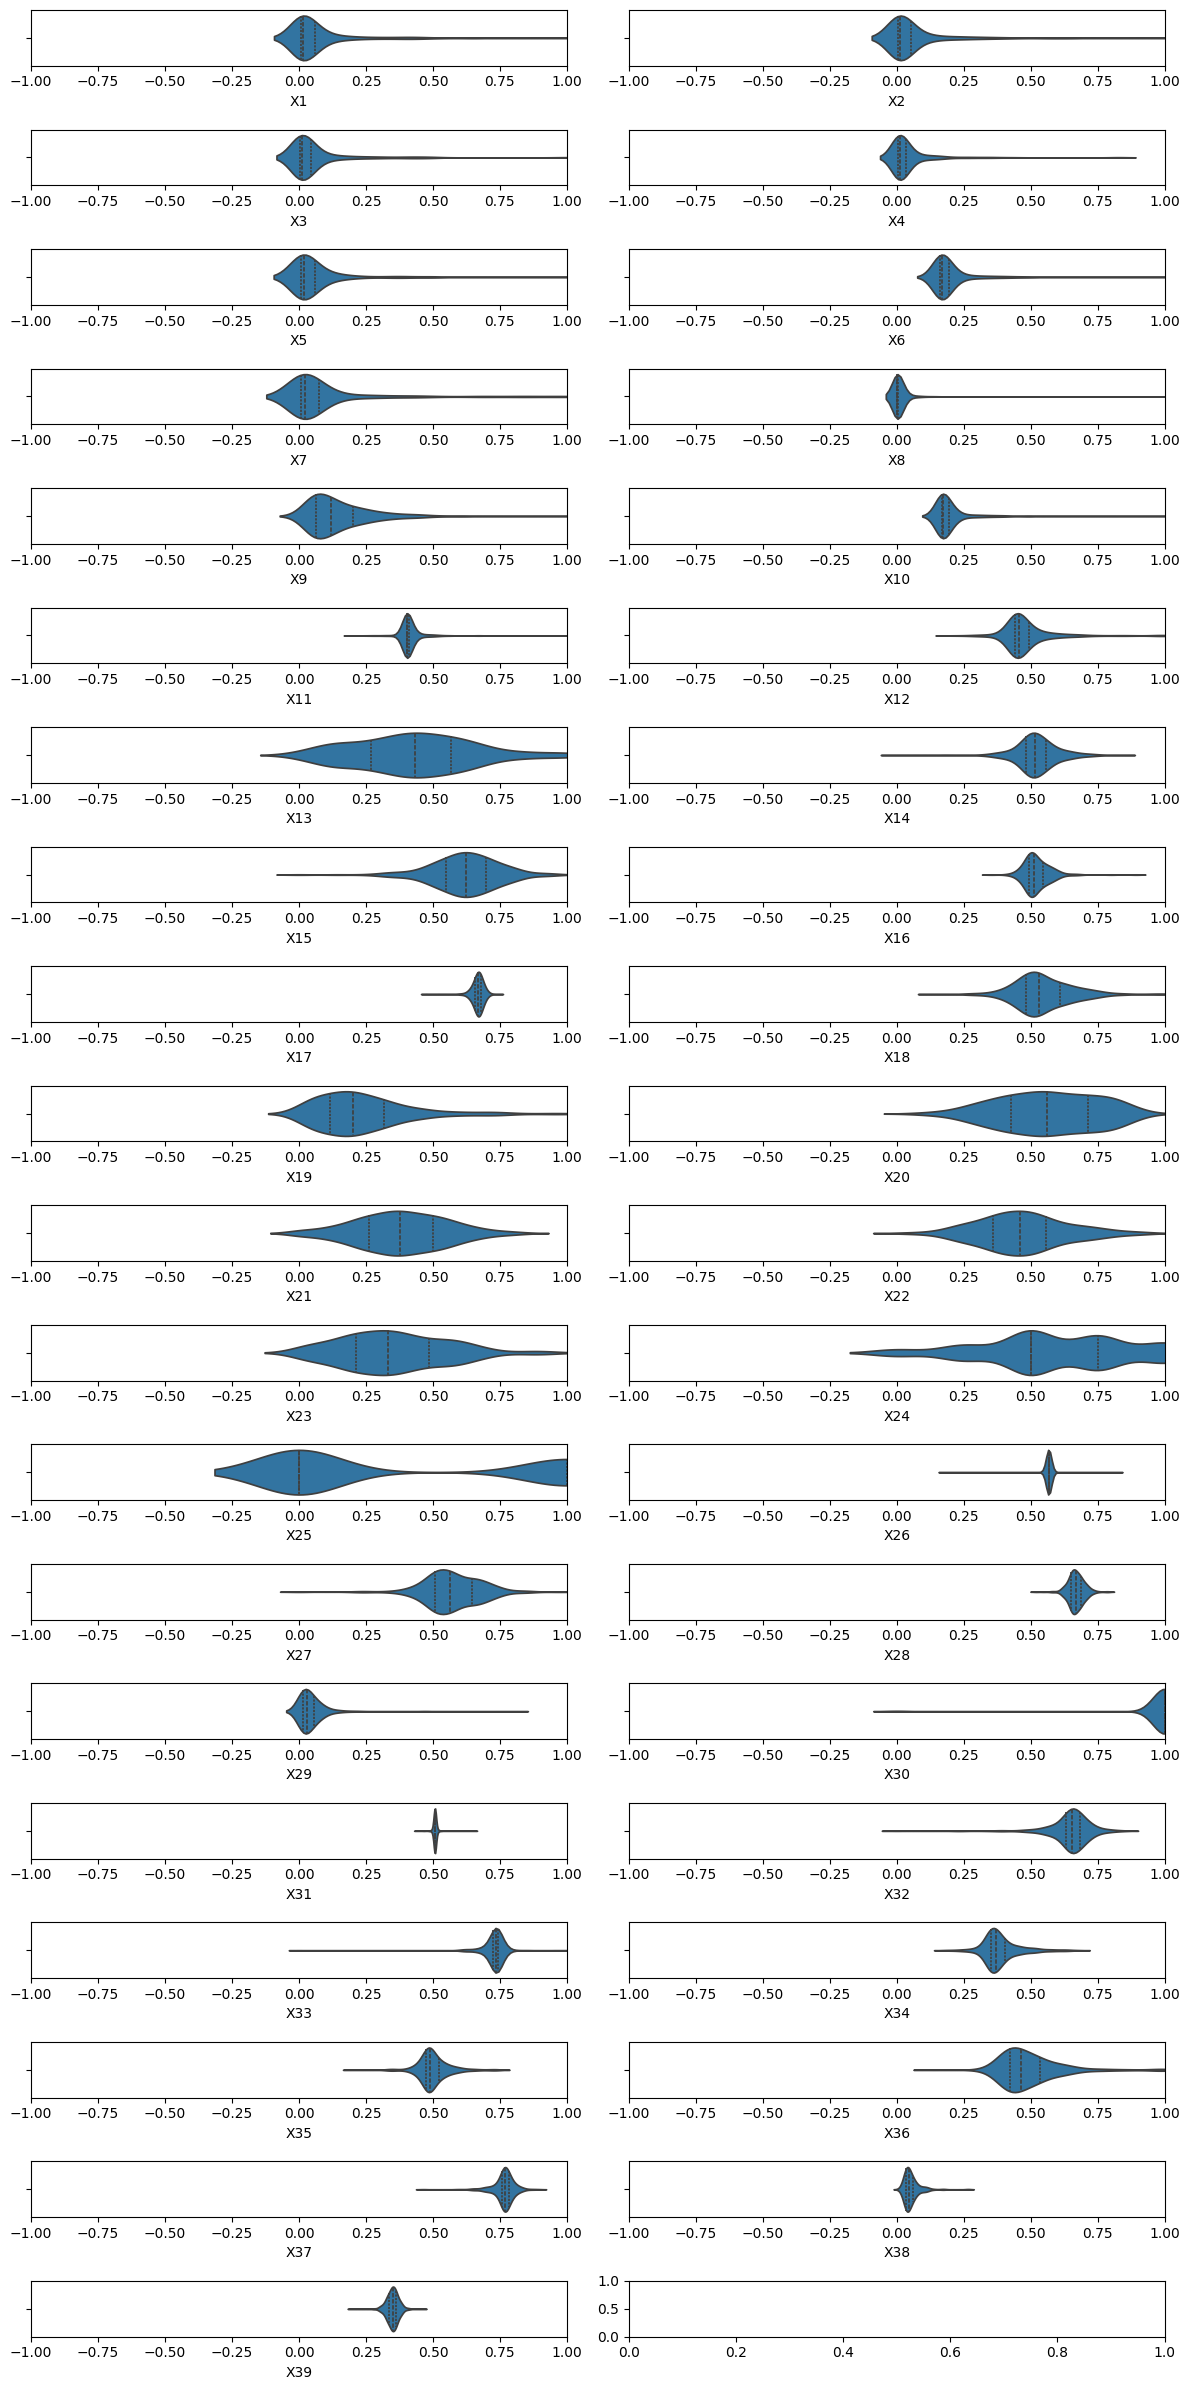

In [228]:
fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(12, 24))

# Flatten the axes array to iterate through each subplot
axes = axes.flatten()

# Loop through each column and create a violin plot
for i, column in enumerate(df_under_x.columns):
    sns.violinplot(x=df_under_x[column], ax=axes[i], inner="quart")
    # Set ticks and labels for each subplot
    axes[i].set_xlim((-1, 1))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

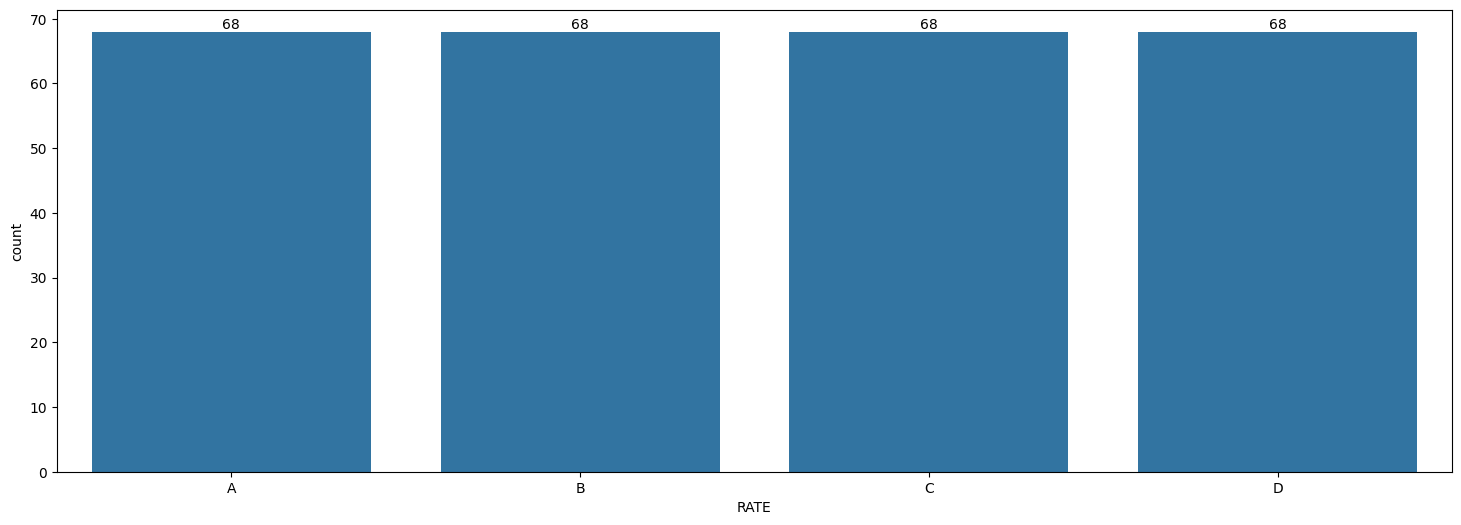

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.countplot(pd.DataFrame(df_under_y, columns=["RATE"]), x="RATE", ax=axes)
axes.bar_label(axes.containers[0])

plt.show()

In [229]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(df_under_x, 
                                                    df_under_y, stratify=df_under_y, 
                                                    test_size=0.2, 
                                                    random_state=16)

In [238]:
res_og_under = naive_bayes_fits(X_train_under, y_train_under, X_test_under, y_test_under)

gaussian, test acc: 0.3455%
multinom, test acc: 0.2545%
complement, test acc: 0.2727%
bernoulli, test acc: 0.3091%
Best of all: 0.3455


In [234]:
collinear_cols = get_collinear_features(df_under_x, 0.4)
X_train_under_nonc = X_train_under.drop(columns=collinear_cols)
X_test_under_nonc  = X_test_under.drop(columns=collinear_cols)

X2 | X1 | 0.95
X3 | X1 | 0.97
X3 | X2 | 0.98
X4 | X1 | 0.93
X4 | X2 | 0.87
X4 | X3 | 0.91
X5 | X1 | 0.95
X5 | X2 | 0.89
X5 | X3 | 0.91
X5 | X4 | 0.9
X6 | X1 | 0.93
X6 | X2 | 0.93
X6 | X3 | 0.95
X6 | X4 | 0.92
X6 | X5 | 0.91
X7 | X1 | 0.97
X7 | X2 | 0.92
X7 | X3 | 0.93
X7 | X4 | 0.83
X7 | X5 | 0.91
X7 | X6 | 0.87
X8 | X1 | 0.52
X8 | X2 | 0.52
X8 | X3 | 0.57
X8 | X4 | 0.6
X8 | X5 | 0.52
X8 | X6 | 0.58
X8 | X7 | 0.42
X9 | X5 | 0.41
X10 | X1 | 0.87
X10 | X2 | 0.86
X10 | X3 | 0.86
X10 | X4 | 0.84
X10 | X5 | 0.84
X10 | X6 | 0.91
X10 | X7 | 0.82
X10 | X8 | 0.67
X11 | X1 | 0.59
X11 | X2 | 0.61
X11 | X3 | 0.6
X11 | X4 | 0.67
X11 | X5 | 0.65
X11 | X6 | 0.74
X11 | X7 | 0.49
X11 | X8 | 0.69
X11 | X10 | 0.8
X16 | X15 | 0.53
X17 | X15 | 0.56
X17 | X16 | 0.67
X18 | X15 | 0.54
X18 | X16 | 0.96
X18 | X17 | 0.76
X20 | X2 | 0.42
X21 | X15 | 0.61
X21 | X16 | 0.58
X21 | X17 | 0.57
X21 | X18 | 0.62
X22 | X15 | 0.8
X22 | X16 | 0.6
X22 | X17 | 0.61
X22 | X18 | 0.63
X22 | X21 | 0.71
X27 | X14 | 0.51
X27 | X25 

In [239]:
explained_variance_ratio = 0
i = 0
while(explained_variance_ratio < 0.8):
    i += 1
    pca = PCA(n_components=i)
    pca.fit(X_train_under)
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)

print("With {} components the PCA retains {:.4f}% of the original variance.".format(i, (explained_variance_ratio*100)))

With 7 components the PCA retains 83.3852% of the original variance.


In [240]:
X_train_pca_under = pca.transform(X_train_under)
X_test_pca_under = pca.transform(X_test_under)

In [241]:
pca_minmax = MinMaxScaler(feature_range=(0,1))
pca_minmax.fit(X_train_pca_under)
X_train_pca_under = pca_minmax.transform(X_train_pca_under)
X_test_pca_under = pca_minmax.transform(X_test_pca_under)

In [243]:
res_pca_under = naive_bayes_fits(X_train_pca_under, y_train_under, X_test_pca_under, y_test_under)

gaussian, test acc: 0.4182%
multinom, test acc: 0.2727%
complement, test acc: 0.2727%
bernoulli, test acc: 0.2727%
Best of all: 0.4182


In [253]:
res_pca_under["gaussian"]["test"]["macro avg"]["f1-score"]
res_pca_under["gaussian"]["test"]["accuracy"]
res_pca_under["gaussian"]["test_pred"]

array(['D', 'A', 'C', 'D', 'A', 'D', 'D', 'C', 'D', 'C', 'A', 'D', 'D',
       'C', 'D', 'C', 'C', 'D', 'C', 'B', 'A', 'C', 'C', 'A', 'B', 'A',
       'A', 'C', 'B', 'C', 'A', 'A', 'B', 'A', 'D', 'A', 'D', 'A', 'D',
       'B', 'D', 'A', 'D', 'B', 'D', 'C', 'B', 'A', 'D', 'C', 'A', 'C',
       'C', 'C', 'A'], dtype='<U1')

<Axes: >

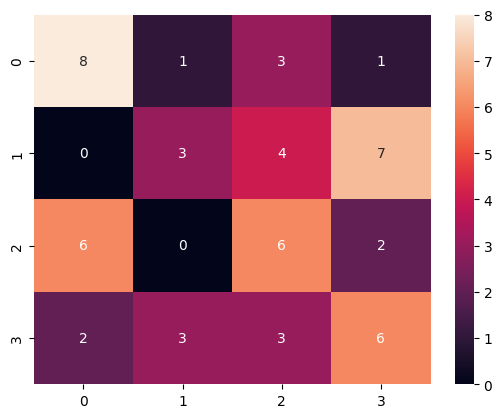

In [258]:


cf_matrix = confusion_matrix(y_test_under, res_pca_under["gaussian"]["test_pred"])
sns.heatmap(cf_matrix, annot=True)

# Experimentos

In [176]:
def gaussian_bayes(x_train, y_train, x_test, y_test):
    gnb = GaussianNB()
    y_pred_train = gnb.fit(x_train, y_train).predict(x_train)
    y_pred_test  = gnb.predict(x_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)

    print("Train Acc: {:.4f}%".format(train_acc * 100))
    print("Test Acc: {:.4f}%".format(test_acc * 100))
    return gnb, y_pred_train, y_pred_test

def multinomial_bayes(x_train, y_train, x_test, y_test):
    mnb = MultinomialNB(force_alpha=True)
    y_pred_train = mnb.fit(x_train, y_train).predict(x_train)
    y_pred_test  = mnb.predict(x_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)

    print("Train Acc: {:.4f}%".format(train_acc * 100))
    print("Test Acc: {:.4f}%".format(test_acc * 100))
    return mnb, y_pred_train, y_pred_test

def complement_bayes(x_train, y_train, x_test, y_test):
    cnb = ComplementNB(force_alpha=True)
    y_pred_train = cnb.fit(x_train, y_train).predict(x_train)
    y_pred_test  = cnb.predict(x_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)

    print("Train Acc: {:.4f}%".format(train_acc * 100))
    print("Test Acc: {:.4f}%".format(test_acc * 100))
    return cnb, y_pred_train, y_pred_test

def bernoulli_bayes(x_train, y_train, x_test, y_test):
    bnb = BernoulliNB(force_alpha=True)
    y_pred_train = bnb.fit(x_train, y_train).predict(x_train)
    y_pred_test  = bnb.predict(x_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)

    print("Train Acc: {:.4f}%".format(train_acc * 100))
    print("Test Acc: {:.4f}%".format(test_acc * 100))
    return bnb, y_pred_train, y_pred_test

def categorial_bayes(x_train, y_train, x_test, y_test):
    catnb = CategoricalNB(force_alpha=True)
    y_pred_train = catnb.fit(x_train, y_train).predict(x_train)
    y_pred_test  = catnb.predict(x_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)

    print("Train Acc: {:.4f}%".format(train_acc * 100))
    print("Test Acc: {:.4f}%".format(test_acc * 100))
    return catnb, y_pred_train, y_pred_test

## Gaussian Naïve Bayes

In [150]:
print("All variables:")
gauss_all, _, _ = gaussian_bayes(X_train, y_train, X_test, y_test);

print("Removed correlated variables:")
gauss_rmvars, _, _ = gaussian_bayes(X_train_nonc, y_train, X_test_nonc, y_test);

print("PCA removed:")
gauss_pca, _, _ = gaussian_bayes(X_train_pca, y_train, X_test_pca, y_test);


All variables:
Train Acc: 30.3965%
Test Acc: 26.3158%
Removed correlated variables:
Train Acc: 41.2628%
Test Acc: 38.0117%
PCA removed:
Train Acc: 43.1718%
Test Acc: 40.9357%


In [153]:
classification_report(y_test, _, output_dict=True)["accuracy"]

0.4093567251461988

In [144]:
print("All variables:")
_, _, _ = gaussian_bayes(x_train_bin, y_train, x_test_bin, y_test);
_, _, _ = multinomial_bayes(x_train_bin, y_train, x_test_bin, y_test);
_, _, _ = complement_bayes(x_train_bin, y_train, x_test_bin, y_test);
_, _, _ = complement_bayes(x_train_bin, y_train, x_test_bin, y_test);
_, _, _ = categorial_bayes(x_train_bin, y_train, x_test_bin, y_test);

print("Removed correlated variables:")
_, _, _ = gaussian_bayes(x_train_non_bin, y_train, x_test_non_bin, y_test);
_, _, _ = multinomial_bayes(x_train_non_bin, y_train, x_test_non_bin, y_test);
_, _, _ = complement_bayes(x_train_non_bin, y_train, x_test_non_bin, y_test);
_, _, _ = bernoulli_bayes(x_train_non_bin, y_train, x_test_non_bin, y_test);
_, _, _ = categorial_bayes(x_train_non_bin, y_train, x_test_non_bin, y_test);

print("PCA removed:")
_, _, _ = gaussian_bayes(x_train_pca_bin, y_train, x_test_pca_bin, y_test);
_, _, _ = multinomial_bayes(x_train_pca_bin, y_train, x_test_pca_bin, y_test);
_, _, _ = complement_bayes(x_train_pca_bin, y_train, x_test_pca_bin, y_test);
_, _, _ = bernoulli_bayes(x_train_pca_bin, y_train, x_test_pca_bin, y_test);
_, _, _ = categorial_bayes(x_train_pca_bin, y_train, x_test_pca_bin, y_test);

All variables:
Train Acc: 41.8502%
Test Acc: 34.5029%
Train Acc: 42.4376%
Test Acc: 39.7661%
Train Acc: 38.0323%
Test Acc: 32.1637%
Train Acc: 38.0323%
Test Acc: 32.1637%
Train Acc: 51.3950%
Test Acc: 32.1637%
Removed correlated variables:
Train Acc: 41.4097%
Test Acc: 35.6725%
Train Acc: 42.8781%
Test Acc: 41.5205%
Train Acc: 30.9838%
Test Acc: 25.7310%
Train Acc: 42.8781%
Test Acc: 40.3509%
Train Acc: 50.5140%
Test Acc: 35.6725%
PCA removed:
Train Acc: 42.7313%
Test Acc: 39.7661%
Train Acc: 42.5844%
Test Acc: 42.1053%
Train Acc: 32.3054%
Test Acc: 32.1637%
Train Acc: 42.7313%
Test Acc: 42.1053%
Train Acc: 49.9266%
Test Acc: 42.1053%


In [179]:
pca_bin_res = naive_bayes_fits(x_train_pca_bin, y_train, x_test_pca_bin, y_test, is_categorical=True)


gaussian, test acc: 0.3977%
multinom, test acc: 0.4211%
complement, test acc: 0.3216%
bernoulli, test acc: 0.4211%
categorical, test acc: 0.4211%
Best of all: 0.42105263157894735


'              precision    recall  f1-score   support\n\n           A       0.33      0.07      0.12        14\n           B       0.41      0.92      0.57        72\n           C       0.17      0.02      0.04        45\n           D       0.00      0.00      0.00        40\n\n    accuracy                           0.40       171\n   macro avg       0.23      0.25      0.18       171\nweighted avg       0.24      0.40      0.26       171\n'

In [181]:
print(classification_report(y_test, pca_bin_res["multinom"]["test_pred"]))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        14
           B       0.42      1.00      0.59        72
           C       0.00      0.00      0.00        45
           D       0.00      0.00      0.00        40

    accuracy                           0.42       171
   macro avg       0.11      0.25      0.15       171
weighted avg       0.18      0.42      0.25       171



/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/valentino/Irithyll1/repos/ClubFansIris/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [174]:
pca_bin_res["bernoulli"]["stats"]["test"]

{'A': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14.0},
 'B': {'precision': 0.4235294117647059,
  'recall': 1.0,
  'f1-score': 0.5950413223140496,
  'support': 72.0},
 'C': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 45.0},
 'D': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 40.0},
 'accuracy': 0.42105263157894735,
 'macro avg': {'precision': 0.10588235294117647,
  'recall': 0.25,
  'f1-score': 0.1487603305785124,
  'support': 171.0},
 'weighted avg': {'precision': 0.17832817337461299,
  'recall': 0.42105263157894735,
  'f1-score': 0.2505437146585472,
  'support': 171.0}}

## Multinomial Naïve Bayes

In [76]:
pca_minmax = MinMaxScaler(feature_range=(0,1))
pca_minmax.fit(X_train_pca)
X_train_pca_abs = pca_minmax.transform(X_train_pca)
X_test_pca_abs = pca_minmax.transform(X_test_pca)
# X_train_pca_abs = pca_minmax.transform(X_train_pca)

In [138]:
print("All variables:")
multinom_all, _, _ = multinomial_bayes(X_train, y_train, X_test, y_test);

print("Removed correlated variables:")
multinom_rmvars, _, _ = multinomial_bayes(X_train_nonc, y_train, X_test_nonc, y_test);

print("PCA removed:")
multinom_pca, _, _ = multinomial_bayes(X_train_pca_abs, y_train, X_test_pca_abs, y_test);

All variables:
Train Acc: 42.5844%
Test Acc: 40.9357%
Removed correlated variables:
Train Acc: 42.4376%
Test Acc: 42.1053%
PCA removed:
Train Acc: 42.4376%
Test Acc: 42.1053%


In [136]:
print("All variables:")
comp_all, _, _ = bernoulli_bayes(X_train, y_train, X_test, y_test);

print("Removed correlated variables:")
comp_rmvars, _, _ = bernoulli_bayes(X_train_nonc, y_train, X_test_nonc, y_test);

print("PCA removed:")
comp_pca, _, _ = bernoulli_bayes(X_train_pca_abs, y_train, X_test_pca_abs, y_test);

All variables:
Train Acc: 43.1718%
Test Acc: 41.5205%
Removed correlated variables:
Train Acc: 43.1718%
Test Acc: 42.1053%
PCA removed:
Train Acc: 42.8781%
Test Acc: 42.1053%


In [29]:
def get_kaggle_pred(model, data, id, path="./kaggle_out.csv"):
    model_pred = model.predict(data)
    kaggle_dict = {"ID" : id, "RATE" : model_pred}
    pd.DataFrame(data=kaggle_dict).to_csv(path, index=False)

In [73]:
get_kaggle_pred(gauss_all, df_test, df_test_IDs, path="./kaggle__gauss_all.csv")
get_kaggle_pred(gauss_rmvars, df_test.drop(columns=collinear_cols), df_test_IDs, path="./kaggle__gauss_rmvars.csv")
get_kaggle_pred(gauss_pca, df_test_pca, df_test_IDs, path="./kaggle__gauss_pca.csv")

In [103]:
a = pd.DataFrame(a)

In [107]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.040741,0.035744,0.033769,0.030328,0.040898,0.184342,0.047518,0.007997,0.138567,0.186764,...,0.964758,0.506869,0.626340,0.716157,0.384631,0.498995,0.502224,0.737175,0.082339,0.344520
std,0.126323,0.121029,0.118414,0.103044,0.127938,0.096042,0.146747,0.052668,0.140319,0.085429,...,0.184527,0.039793,0.148562,0.080243,0.105124,0.098879,0.145660,0.131184,0.081913,0.045723
min,0.000000,0.000000,0.000000,0.000066,0.000090,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010067,0.000000,0.000000,0.000000,0.000000,0.073277
25%,0.003287,0.001422,0.001774,0.003971,0.003215,0.159372,0.003127,0.000339,0.054963,0.165938,...,1.000000,0.503292,0.597185,0.715203,0.339686,0.461508,0.413600,0.738120,0.042400,0.331626
50%,0.007472,0.004504,0.004535,0.007997,0.008294,0.162165,0.007001,0.000803,0.096277,0.168517,...,1.000000,0.506763,0.659887,0.735240,0.366125,0.491281,0.467100,0.769703,0.060554,0.347544
75%,0.021464,0.015359,0.013720,0.018071,0.023326,0.171526,0.021173,0.002301,0.165574,0.176057,...,1.000000,0.508438,0.703378,0.748319,0.407057,0.527484,0.551002,0.791202,0.093787,0.362304
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
a

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.0,4.0,2.0,1.0,2.0,0.0,3.0,0.0,6.0,2.0,...,0.0,1.0,0.0,0.0,2.0,1.0,7.0,1.0,2.0,6.0
1,1.0,0.0,1.0,5.0,0.0,1.0,2.0,2.0,6.0,1.0,...,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,5.0,7.0
2,7.0,7.0,6.0,7.0,7.0,8.0,5.0,8.0,5.0,9.0,...,0.0,1.0,9.0,8.0,9.0,9.0,8.0,9.0,8.0,8.0
3,4.0,2.0,4.0,0.0,3.0,0.0,6.0,4.0,4.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,2.0,2.0,1.0,2.0,0.0,1.0,4.0,2.0,...,0.0,5.0,3.0,3.0,2.0,3.0,5.0,3.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,0.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,7.0,2.0,...,0.0,3.0,2.0,2.0,2.0,2.0,6.0,3.0,4.0,2.0
677,7.0,8.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,6.0,...,0.0,6.0,4.0,4.0,6.0,6.0,2.0,4.0,2.0,5.0
678,0.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,6.0,5.0,...,0.0,9.0,9.0,9.0,7.0,6.0,8.0,8.0,7.0,4.0
679,8.0,8.0,8.0,9.0,7.0,7.0,7.0,8.0,2.0,7.0,...,0.0,3.0,5.0,4.0,9.0,9.0,8.0,6.0,5.0,5.0


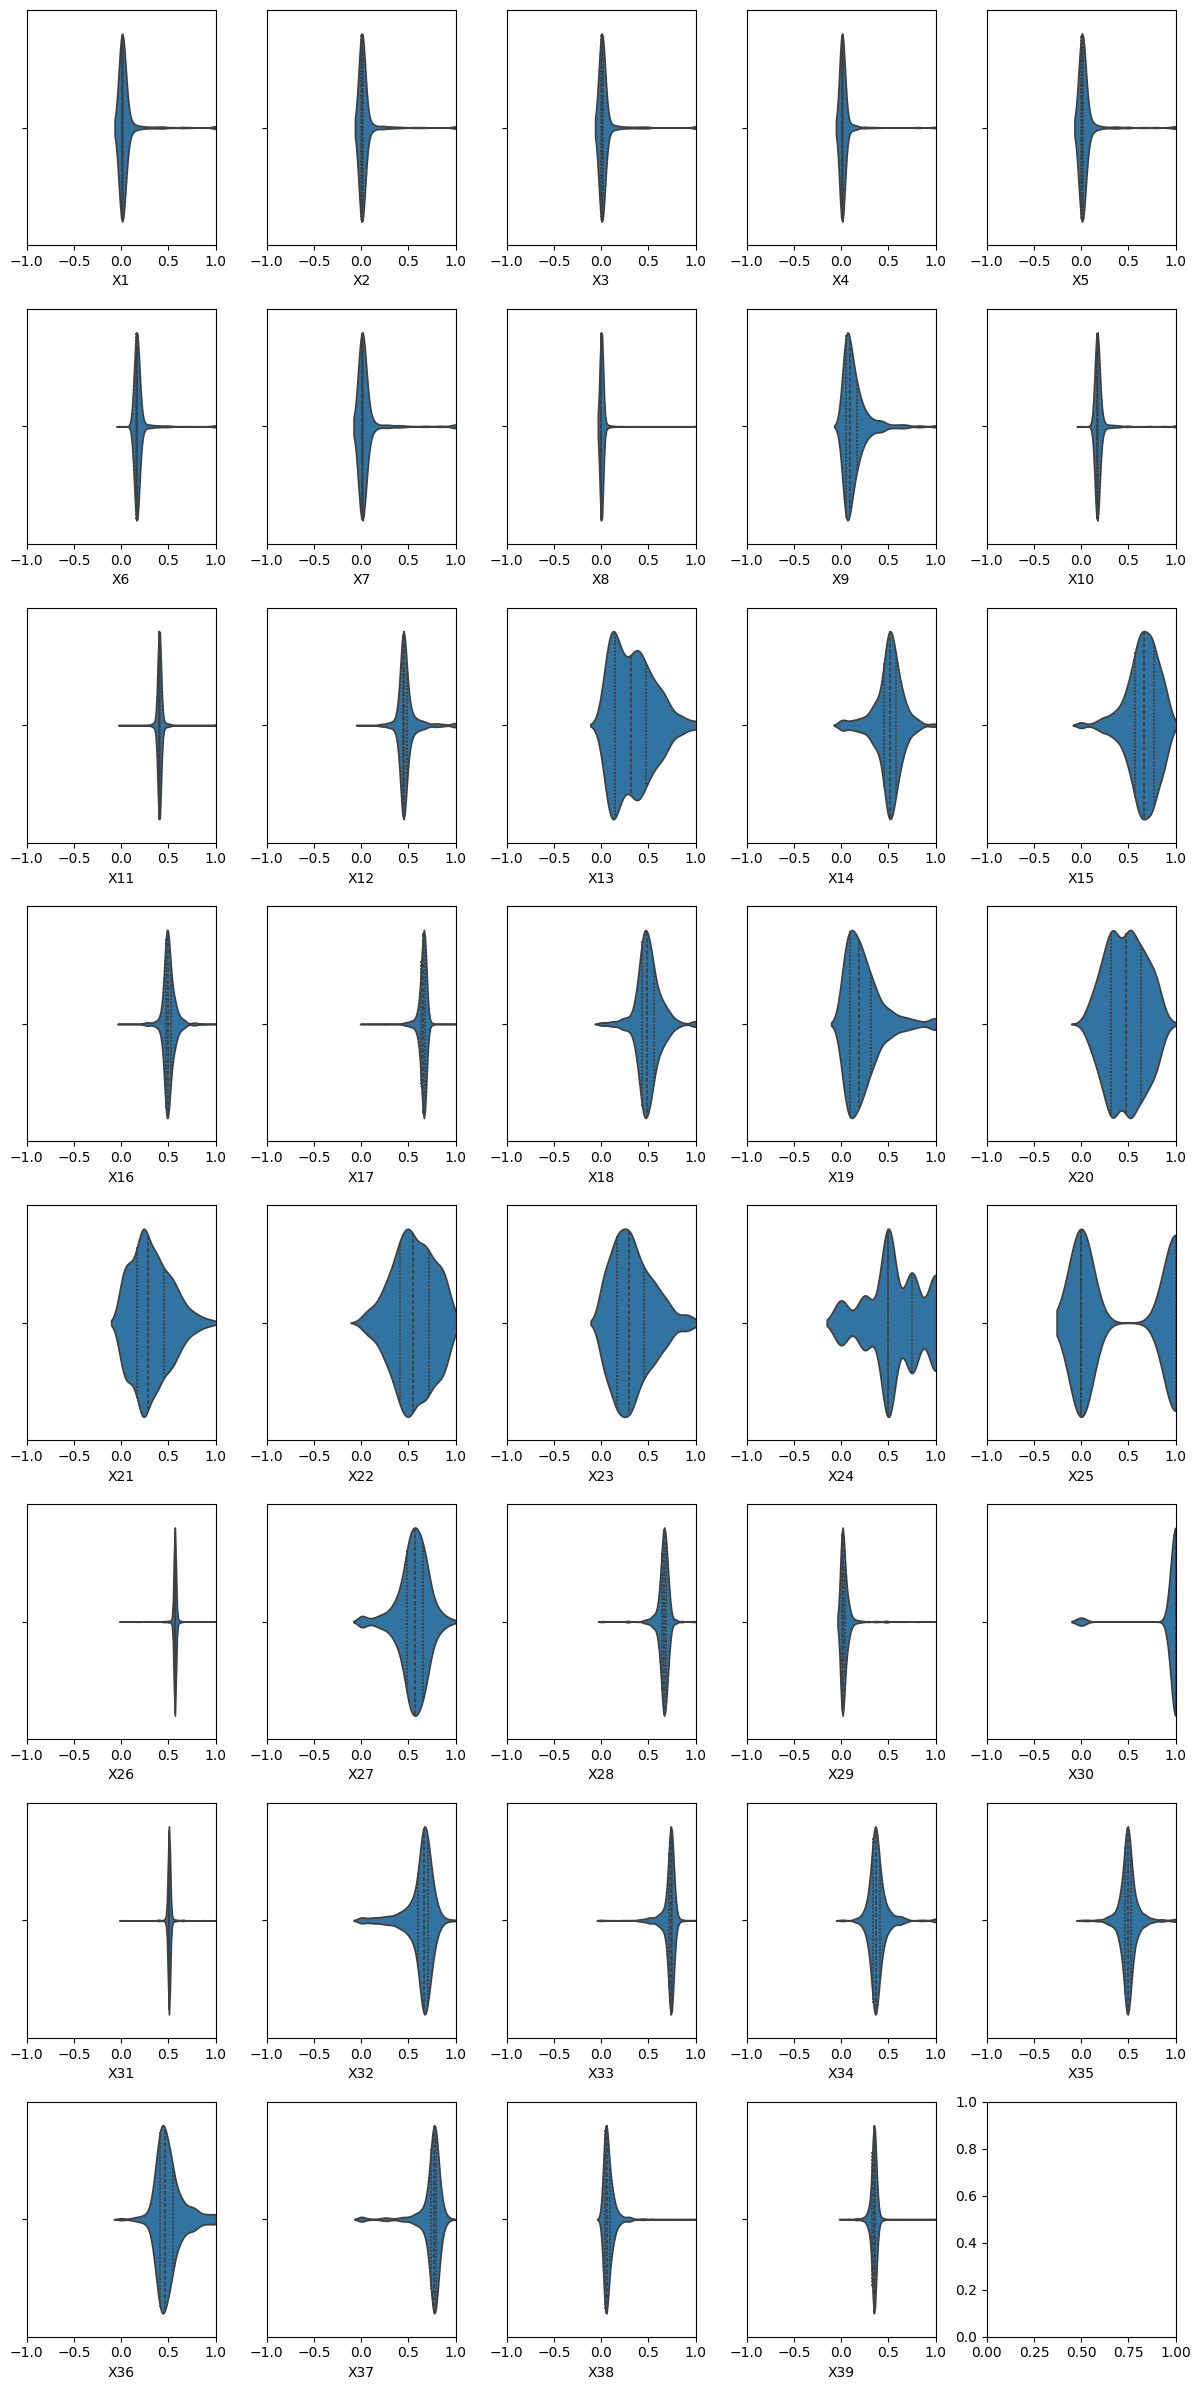

In [113]:
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(12, 24))

# Flatten the axes array to iterate through each subplot
axes = axes.flatten()

# Loop through each column and create a violin plot
for i, column in enumerate(df_train.drop(columns=["RATE"]).columns):
    sns.violinplot(x=df_train.drop(columns=["RATE"])[column], ax=axes[i], inner="quart")
    # Set ticks and labels for each subplot
    axes[i].set_xlim((-1, 1))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

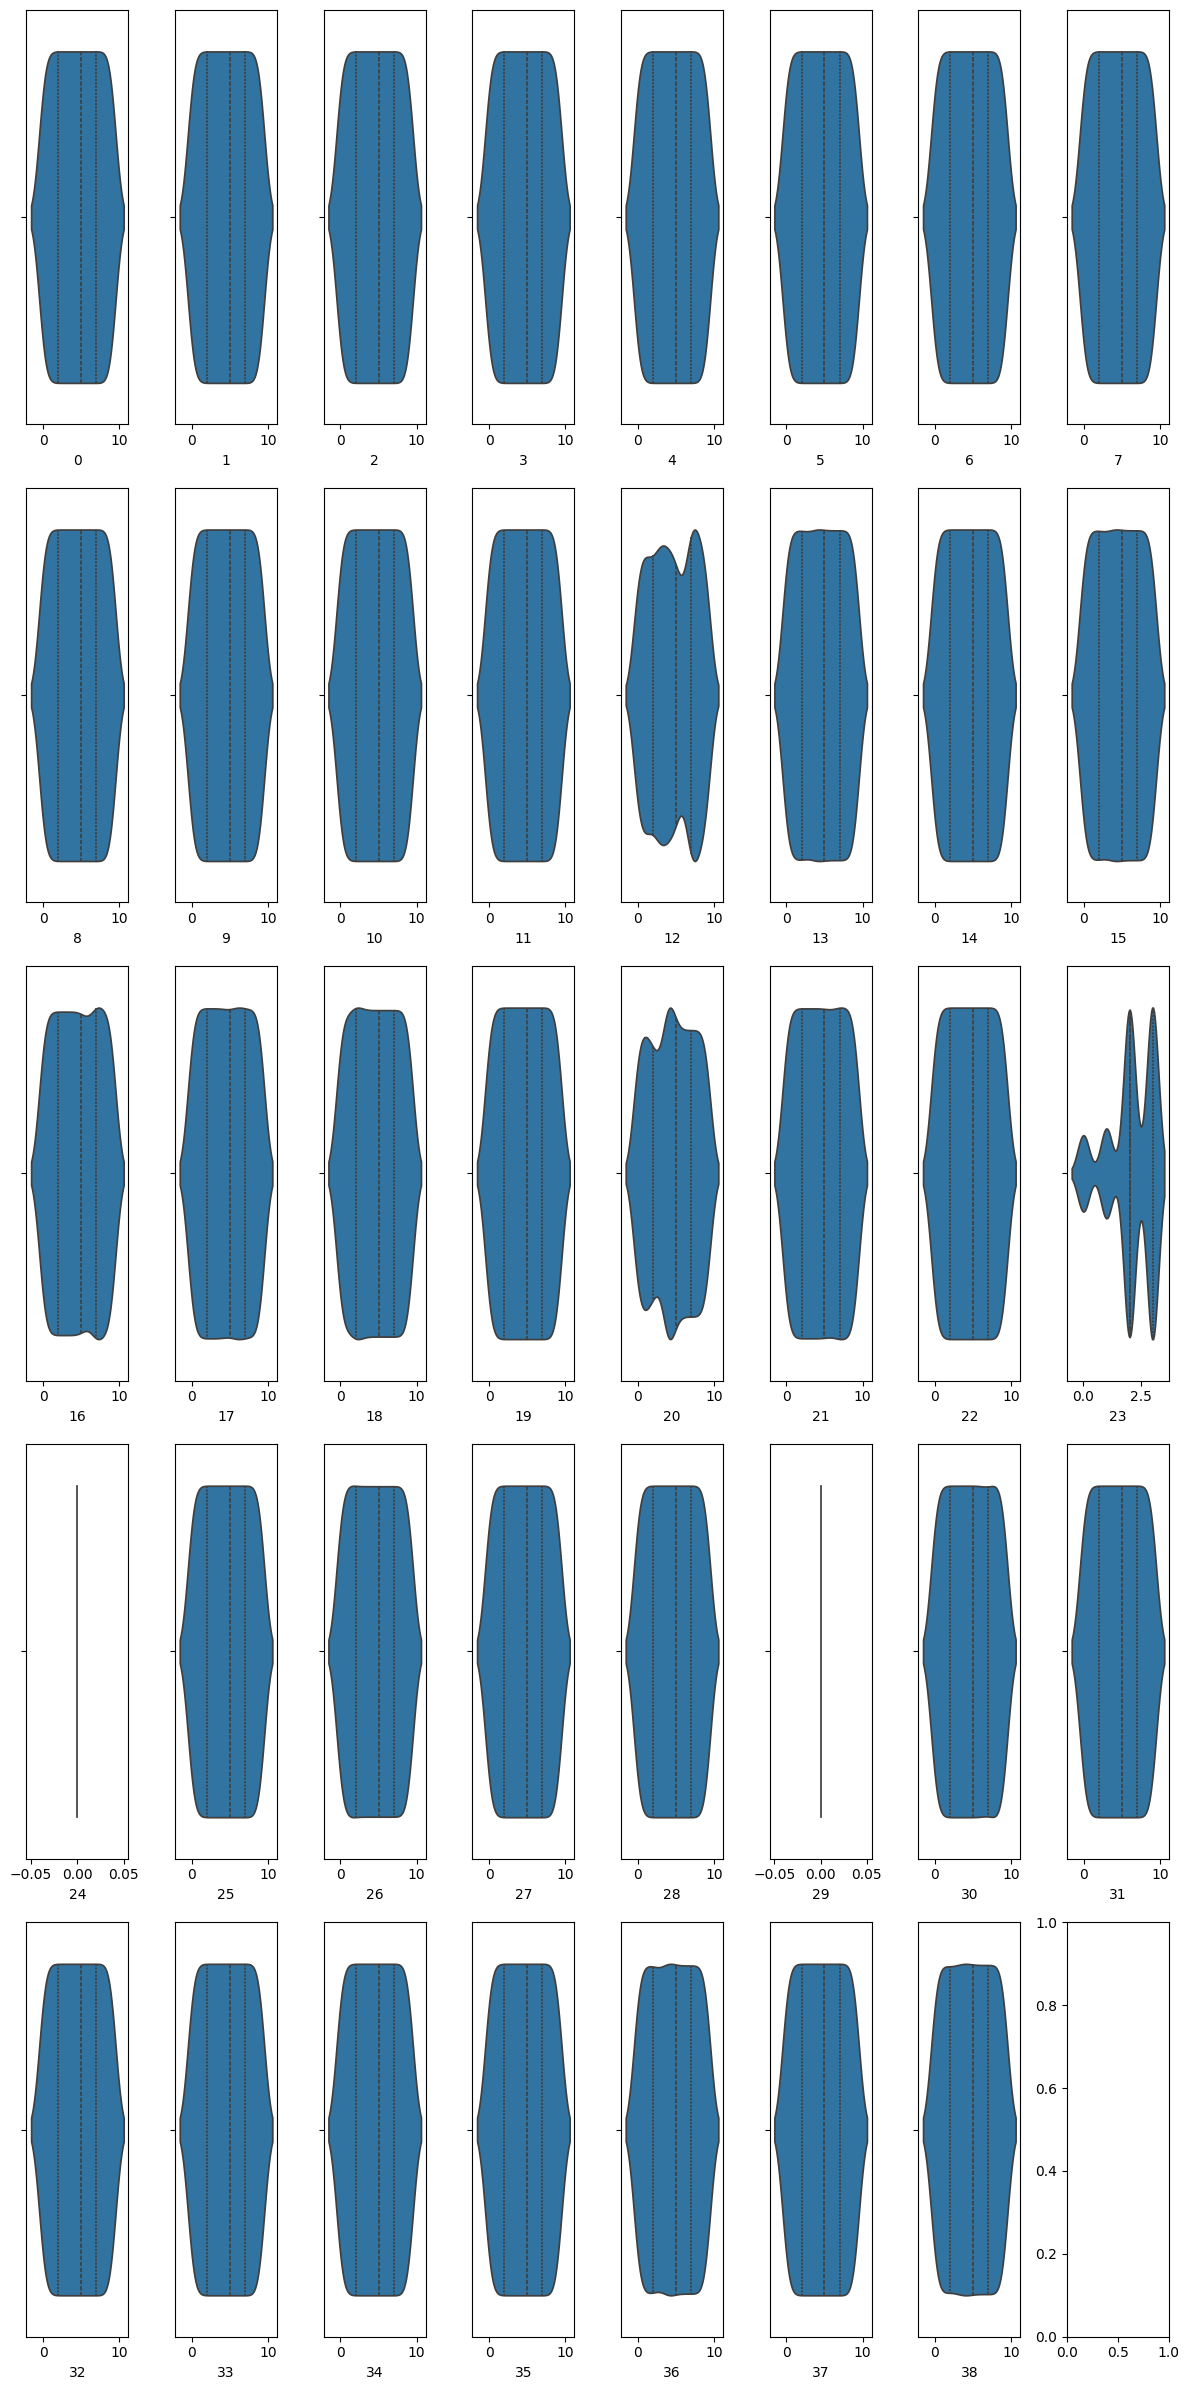

In [109]:
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(12, 24))

# Flatten the axes array to iterate through each subplot
axes = axes.flatten()

# Loop through each column and create a violin plot
for i, column in enumerate(a.columns):
    sns.violinplot(x=a[column], ax=axes[i], inner="quart")
    # Set ticks and labels for each subplot

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()